In [2]:
# Importing the MDAnalysis package.
import MDAnalysis as mda

# Creating the Universe object.
u = mda.Universe('MDAnalysis_Programmation_python_2/PDB_tubuline.pdb',
                 'MDAnalysis_Programmation_python_2/trajectoire_tubuline.dcd')

# Create a selection of atoms to work with.
ag = u.atoms.select_atoms('backbone')

# Select all solvent within a set distance from protein atoms.
ag = u.select_atoms('resname SOL and around 5.0 protein')

# Select all heavy atoms in the first 20 residues.
ag = u.select_atoms('resid 1:20 and not prop mass < 10.0')

# Use a preexisting AtomGroup as part of another selection.
sel1 = u.select_atoms('name N and not resname MET')
sel2 = u.select_atoms('around 2.5 group Nsel', Nsel=sel1)

# Perform a selection on another AtomGroup.
sel1 = u.select_atoms('around 5.0 protein')
sel2 = sel1.select_atoms('type O')

/home/codespace/.python/current/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [3]:
# Import specific package for analysis and in this case : rms (rmsd, rmsf) 
from MDAnalysis.analysis import rms

# First you have to select what part of your structure you want to look at
# For now we take as example the alpha carbons of the tubulin
c_alphas = u.select_atoms('protein and name CA')

# Calculate the rmsf for alpha carbons 
R = rms.RMSF(c_alphas).run()

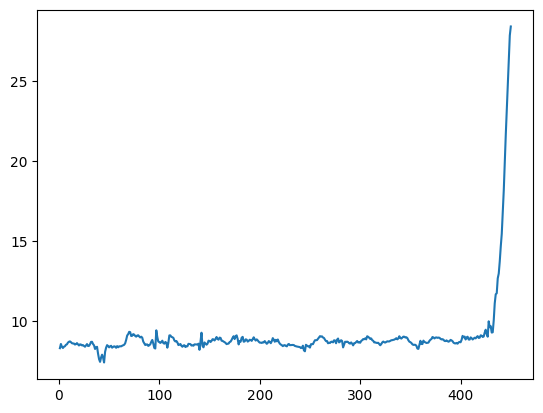

In [4]:
# Import package for plotting
import matplotlib.pyplot as plt

# Then plot your RMSF of alpha carbons
# A graph will be displayed with RMSF values in Angstroms on y-axis and the residue indices on x-axis
plt.plot(c_alphas.resids, R.results.rmsf)

In [5]:
import nglview as nv

view = nv.show_file("MDAnalysis_Programmation_python_2/PDB_tubuline.pdb")  # load the tubuline from the PDB file and display viewer widget
view

NGLWidget()

In [6]:
mz_view = nv.show_mdanalysis(u)
mz_view

NGLWidget(max_frame=999)

In [7]:
# Create an NGLView widget
res_view = nv.show_mdanalysis(u.select_atoms("resid 400:450"))

# Display the widget
res_view

NGLWidget(max_frame=999)

In [8]:
first_frame = u.trajectory[0]
last_frame = u2.trajectory[-1]

merged = mda.Merge(u.atoms, u2.atoms)

ff_view = nv.show_mdanalysis(merged)
ff_view

NameError: name 'u2' is not defined

In [25]:
# Select the residues you want to color
selection = u.select_atoms('resid 400:450')

# Create an NGLView representation for the selected residues
viewt = nv.show_mdanalysis(selection, default_representation=False)
viewt.add_cartoon(color="blue", selection="440-450")
viewt.add_cartoon(color="red", selection="420-439")
viewt.center()

# viewt.representations = [
#     {"type": "cartoon", "params": {
#         "sele": "protein", "color": "blue"
#     }},
#     {"type": "cartoon", "params": {
#         "sele": "440-450", "color": "red"
#     }}
# ]

viewt

NGLWidget(max_frame=999)